Autoría: Albert Ripoll

# Antes de empezar:

    Lee el archivo README.md
    Comenta todo lo que puedas y utiliza los recursos (archivo README.md)
    ¡Feliz aprendizaje!

En este ejercicio, generaremos números aleatorios a partir de las distribuciones continuas que aprendimos en la lección. Hay dos formas de generar números aleatorios:

1. Usando la librería numpy
1. Usando la librería Scipy

Utiliza cualquiera de las dos librerías o ambas en este ejercicio.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Distribución Uniforme

Para generar números aleatorios uniformes entre dos valores dados usando scipy, podemos usar el siguiente código o el código que hemos
discutido en clase:

In [2]:
# En clase se vió el siguiente código para generar números aleatorios uniformes al demostrar el Teorema del Límite Central

lower_bound, upper_bound = 1000, 5000
sample_sizes = [1, 2, 5, 10]  # Different sample sizes to demonstrate the CLT

for i, n in enumerate(sample_sizes):
    # Generating random daily sales data for 'n' days
    daily_sales = np.random.uniform(lower_bound, upper_bound, (10000, n))

**Tarea:**

1. Basándote en el código anterior, escribe una función que genere números aleatorios uniformemente distribuidos. Hay varios requisitos para tu función:
    * Debe aceptar 3 parámetros:
        * `bottom` - el límite inferior de los números generados
        * `ceiling` - el límite superior de los números generados
        * `count` - cuántos números generar
    * Debe devolver una matriz de números aleatorios distribuidos uniformemente

2. Llama a tu función con 2 conjuntos de parámetros a continuación:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

3. Traza las distribuciones uniformes generadas anteriormente utilizando histogramas, donde el eje x es el valor y el eje y es el recuento. Que el número de intervalos del histograma sea 10.

El resultado debe ser como el siguiente:

![image.png](attachment:image.png)

In [3]:
## 1
def uniform_random_numbers(bottom: float, ceiling: float, count: int or tuple) -> float or tuple:
    """
    Función que devuelve una cantidad (count) de números aleatorios distribuidos uniformemente que van entre dos valores dados (bottom y ceiling).
    Entradas:
        bottom (float): límite inferior de los números generados
        ceiling (float): límite superior de los números generados
        count (int or tuple of ints): cuántos números generar. Si es una tupla, se devuelve una matriz o tensor con esa dimensión.
    Return:
        float or tuple of floats: matriz con los números aleatorios distribuidos uniformemente.
    """
    return np.random.uniform(bottom, ceiling, count)

In [4]:
## 2
# Límite inferior y superior de los números generados
bottom, ceiling = 10, 15

# Cantidad de números a generar
count = 100

# Se llama a la función con esos parámetros
uniforme1 = uniform_random_numbers(bottom, ceiling, count)

# Límite inferior y superior de los números generados
bottom, ceiling = 10, 60

# Cantidad de números a generar
count = 1000

# Se llama a la función con esos parámetros
uniforme2 = uniform_random_numbers(bottom, ceiling, count)

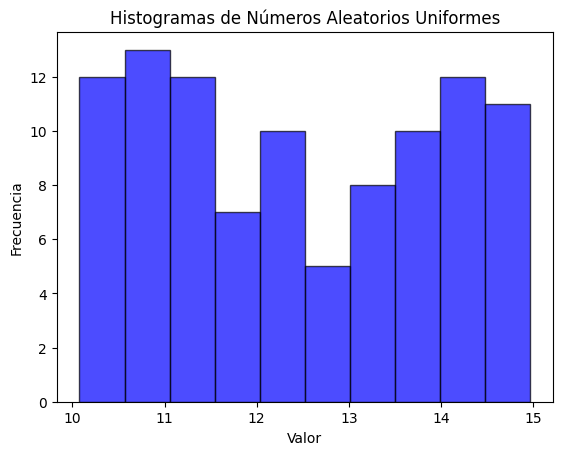

In [5]:
plt.hist(uniforme1, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogramas de Números Aleatorios Uniformes')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

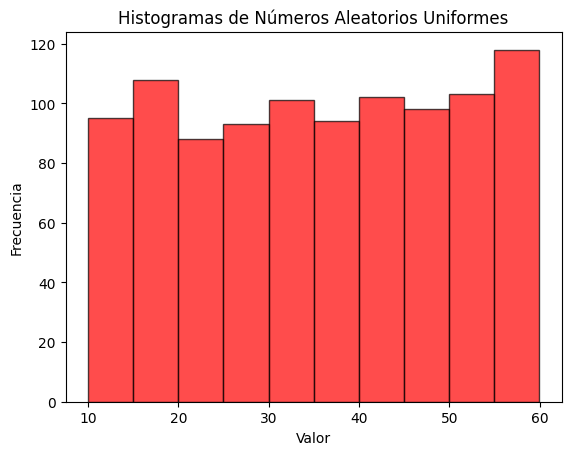

In [6]:
plt.hist(uniforme2, bins=10, color='red', alpha=0.7, edgecolor='black')
plt.title('Histogramas de Números Aleatorios Uniformes')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

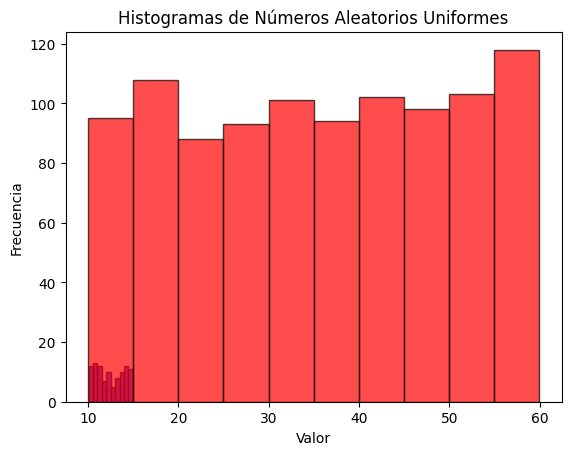

In [7]:
plt.hist(uniforme1, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.hist(uniforme2, bins=10, color='red', alpha=0.7, edgecolor='black')
plt.title('Histogramas de Números Aleatorios Uniformes')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

Como son de diferentes las dos distribuciones?

In [8]:
print("Las distribuciones son diferentes en: \n")
print("• El valor máximo generado (15 y 60)")
print("• La cantidad de valores generados (100 y 1000)")
print("• La aleatoriedad asociada a la generación, aún ser ambos distribuciones uniformes (implicando distinta media, mediana y desviación estándard)")
print("• La dimensión de los intervalos generados (0,5 y 5) \n \n")

print("Las distribuciones son iguales en: \n")
print("• El valor mínimo generado (10)")
print("• La cantidad de intervalos generados (10)")
print("• El tipo de distribución generada (uniforme)")

Las distribuciones son diferentes en: 

• El valor máximo generado (15 y 60)
• La cantidad de valores generados (100 y 1000)
• La aleatoriedad asociada a la generación, aún ser ambos distribuciones uniformes (implicando distinta media, mediana y desviación estándard)
• La dimensión de los intervalos generados (0,5 y 5) 
 

Las distribuciones son iguales en: 

• El valor mínimo generado (10)
• La cantidad de intervalos generados (10)
• El tipo de distribución generada (uniforme)


## Distribución Normal

1. De la misma manera en el reto de Distribución Uniforme, escriba una función que genere números aleatorios distribuidos normalmente.
1. Genera 1.000 números distribuidos normalmente con media de 10 y desviación típica de 1
1. Genera 1.000 números distribuidos normalmente con una media de 10 y una desviación típica de 50
2. Representa gráficamente las distribuciones de los datos generados.

Resultado esperado:

![image.png](attachment:image.png)

In [9]:
from scipy.stats import norm

In [10]:
##1

def normal_random_numbers(mu: float, sigma: float, count: int or tuple) -> float or tuple:
    """
    Función que devuelve una cantidad (count) de números aleatorios distribuidos normalmente.
    Entradas:
        mu (float): Media de los números generados
        sigma (float): Desviación estándar de los números generados
        count (int or tuple of ints): cuántos números generar. Si es una tupla, se devuelve una matriz o tensor con esa dimensión.
    Salida:
        float or tuple of floats: tupla con los números aleatorios distribuidos normalmente.
        """
    return np.random.normal(mu, sigma, count)

In [11]:
## 2
# Media y desviación típica de los números generados
mu, sigma = 10, 1

# Cantidad de números a generar
count = 1000

# Se llama a la función con esos parámetros
normal1 = normal_random_numbers(mu, sigma, count)

In [12]:
## 3
# Media y desviación típica de los números generados
mu, sigma = 10, 50

# Cantidad de números a generar
count = 1000

# Se llama a la función con esos parámetros
normal2 = normal_random_numbers(mu, sigma, count)

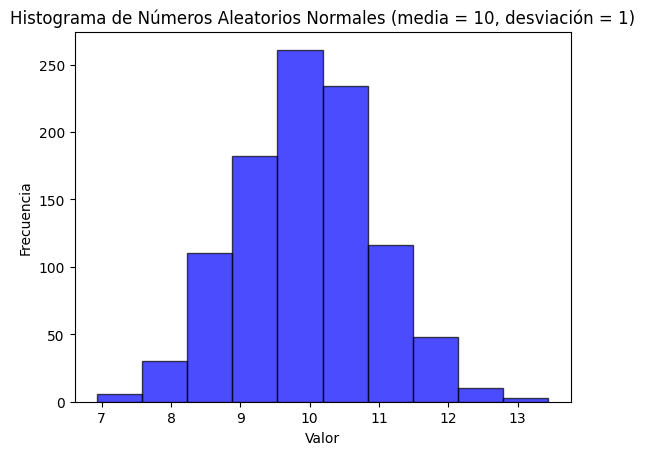

In [13]:
## 4
plt.hist(normal1, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma de Números Aleatorios Normales (media = 10, desviación = 1)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

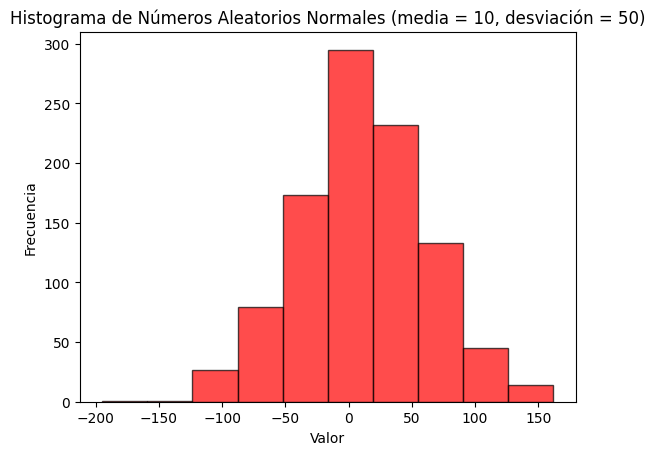

In [14]:
plt.hist(normal2, bins=10, color='red', alpha=0.7, edgecolor='black')
plt.title('Histograma de Números Aleatorios Normales (media = 10, desviación = 50)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

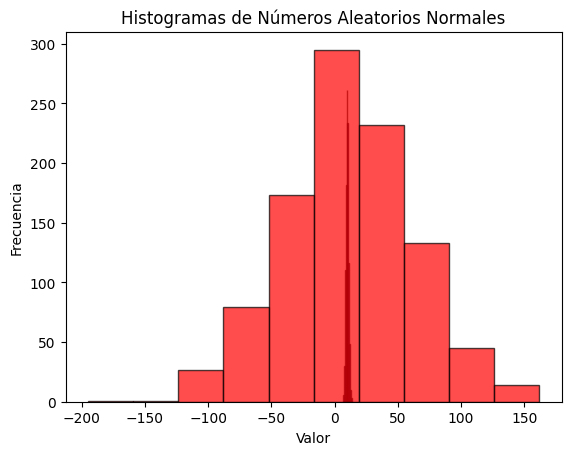

In [15]:
plt.hist(normal1, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.hist(normal2, bins=10, color='red', alpha=0.7, edgecolor='black')
plt.title('Histogramas de Números Aleatorios Normales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

Como son de diferentes las dos distribuciones?

In [16]:
print("Las distribuciones son diferentes en: \n")
print("• La desviación típica y variación de los datos (1 y 1 vs raiz50 y 50)")
print("• La heterogeneidad o dispersión de los datos. Siendo los primeros más homogéneos (menos dispersos) y los segundos más heterogéneos (más dispersos)")
print("• El rango incluido en cada caja (9/10 vs 300/10)")

print("Las distribuciones son iguales en: \n")
print("• La media de los datos (10)")
print("• La cantidad de intervalos generados (1000)")
print("• El tipo de distribución generada (normal)")
print("• La cantidad de cajas (bins=10)")

Las distribuciones son diferentes en: 

• La desviación típica y variación de los datos (1 y 1 vs raiz50 y 50)
• La heterogeneidad o dispersión de los datos. Siendo los primeros más homogéneos (menos dispersos) y los segundos más heterogéneos (más dispersos)
• El rango incluido en cada caja (9/10 vs 300/10)
Las distribuciones son iguales en: 

• La media de los datos (10)
• La cantidad de intervalos generados (1000)
• El tipo de distribución generada (normal)
• La cantidad de cajas (bins=10)


## Distribución Normal de Datos Reales

En este reto vamos a echar un vistazo a los datos reales. Utilizaremos el archivo vehicles.csv para este ejercicio

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
ruta_principal = "/content/drive/My Drive/IronHack/"
vehicles = pd.read_csv(ruta_principal + 'vehicles.csv')

Primero importa vehicles.csv.
A continuación, traza los histogramas de las siguientes variables:

1. Barriles de combustible/año

In [19]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [20]:
vehicles["Fuel Barrels/Year"].min()

0.06

In [21]:
vehicles["Fuel Barrels/Year"].max()

47.08714285714285

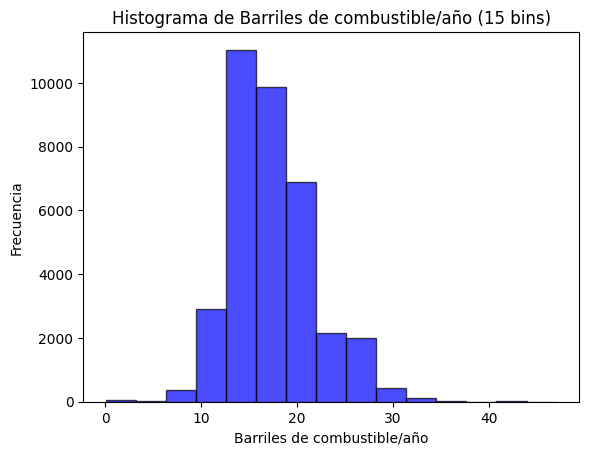

In [22]:
plt.hist(vehicles["Fuel Barrels/Year"], bins=15, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma de Barriles de combustible/año (15 bins)')
plt.xlabel('Barriles de combustible/año')
plt.ylabel('Frecuencia')
plt.show()

2. Emisiones de CO2 Gramos/Milla

In [23]:
vehicles["CO2 Emission Grams/Mile"].min()

37.0

In [24]:
vehicles["CO2 Emission Grams/Mile"].max()

1269.571428571429

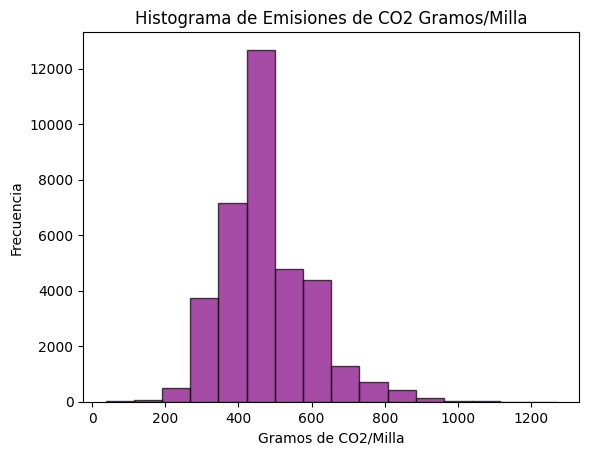

In [25]:
plt.hist(vehicles["CO2 Emission Grams/Mile"], bins=16, color='purple', alpha=0.7, edgecolor='black')
plt.title('Histograma de Emisiones de CO2 Gramos/Milla')
plt.xlabel('Gramos de CO2/Milla')
plt.ylabel('Frecuencia')
plt.show()

3. MPG combinado

In [26]:
vehicles["Combined MPG"].min()

7

In [27]:
vehicles["Combined MPG"].min()

7

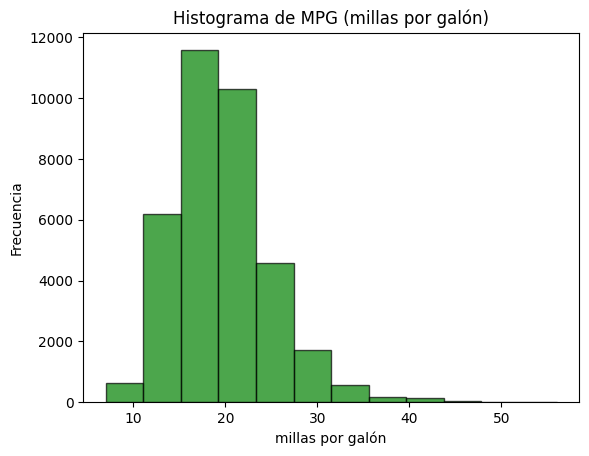

In [28]:
plt.hist(vehicles["Combined MPG"], bins=12, color='green', alpha=0.7, edgecolor='black')
plt.title('Histograma de MPG (millas por galón)')
plt.xlabel('millas por galón')
plt.ylabel('Frecuencia')
plt.show()

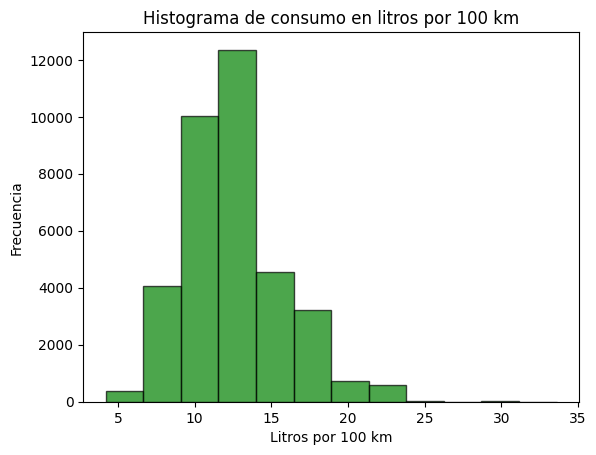

In [29]:
plt.hist(100/(vehicles["Combined MPG"]*1.60934/3.78541), bins=12, color='green', alpha=0.7, edgecolor='black')
plt.title('Histograma de consumo en litros por 100 km')
plt.xlabel('Litros por 100 km')
plt.ylabel('Frecuencia')
plt.show()

# Conversiones
# 1 milla = 1.60934 kilómetros
# 1 galón (EE. UU.) = 3.78541 litros

¿Cuál o cuáles de las variables tienen una distribución casi normal? ¿Cómo lo sabes?

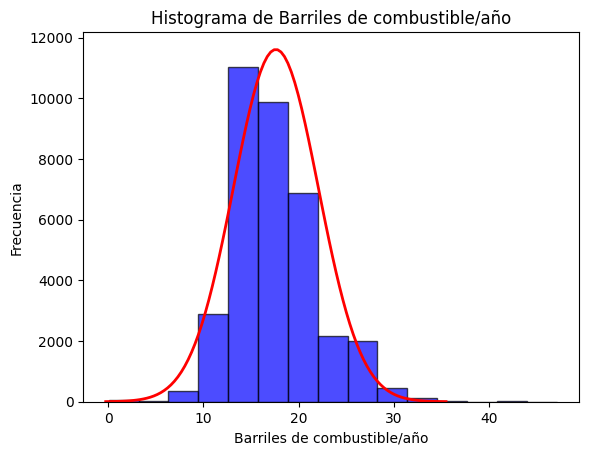

In [30]:
# Parámetros de la distribución normal
mu = vehicles["Fuel Barrels/Year"].mean()  # media
sigma = vehicles["Fuel Barrels/Year"].std()  # desviación estándar
altura = 130000  # altura de la distribución normal

# Parámetros del histograma
bins = 15

# Histograma
plt.hist(vehicles["Fuel Barrels/Year"], bins=bins, color='blue', alpha=0.7, edgecolor='black')

# Valores de x para la curva de la distribución normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
# Calcular la función de densidad de probabilidad
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plotear distribución normal
plt.plot(x, altura*y, color='red', linewidth=2)
plt.title('Histograma de Barriles de combustible/año')
plt.xlabel('Barriles de combustible/año')
plt.ylabel('Frecuencia')
plt.show()

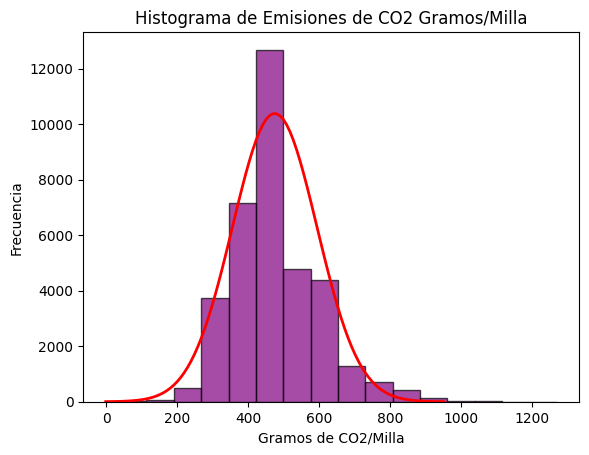

In [31]:
# Parámetros de la distribución normal
mu = vehicles["CO2 Emission Grams/Mile"].mean()  # media
sigma = vehicles["CO2 Emission Grams/Mile"].std()  # desviación estándar
altura = 3100000  # altura de la distribución normal

# Parámetros del histograma
bins = 16

# Histograma
plt.hist(vehicles["CO2 Emission Grams/Mile"], bins=bins, color='purple', alpha=0.7, edgecolor='black')

# Valores de x para la curva de la distribución normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
# Calcular la función de densidad de probabilidad
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plotear distribución normal
plt.plot(x, altura*y, color='red', linewidth=2)
plt.title('Histograma de Emisiones de CO2 Gramos/Milla')
plt.xlabel('Gramos de CO2/Milla')
plt.ylabel('Frecuencia')
plt.show()

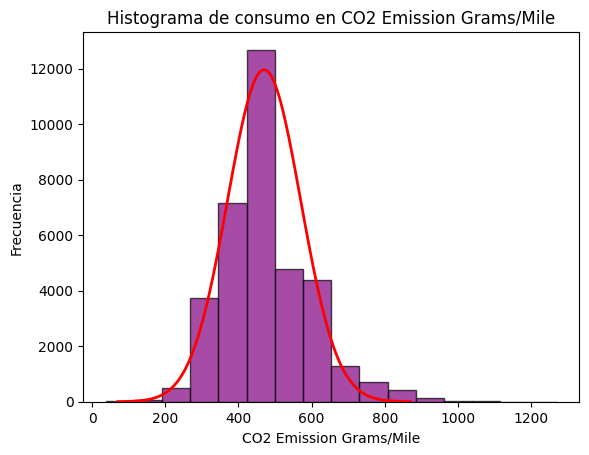

In [50]:
# Parámetros de la distribución normal
mu = 470  # media
sigma = 100  # desviación estándar
altura = 3000000  # altura de la distribución normal

# Parámetros del histograma
bins = 16

# Histograma
plt.hist(vehicles["CO2 Emission Grams/Mile"], bins=bins, color='purple', alpha=0.7, edgecolor='black')

# Valores de x para la curva de la distribución normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
# Calcular la función de densidad de probabilidad
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plotear distribución normal
plt.plot(x, altura*y, color='red', linewidth=2)
plt.title('Histograma de consumo en CO2 Emission Grams/Mile')
plt.xlabel('CO2 Emission Grams/Mile')
plt.ylabel('Frecuencia')
plt.show()

In [51]:
print("No parece que ninguna serie de datos se asimile a una distribución normal.")
print("Lo sé porque he intentado ajustar los datos a una normal y no acaban de tener esa forma.")
print("Los datos que más se asimilarían a una distribución normal serían los de CO2 Emission Grams/Mile.")

No parece que ninguna serie de datos se asimile a una distribución normal.
Lo sé porque he intentado ajustar los datos a una normal y no acaban de tener esa forma.
Los datos que más se asimilarían a una distribución normal serían los de CO2 Emission Grams/Mile.


## Distribución Exponencial

1. Utilizando `numpy.random.exponential`, crea una función que devuelva una lista de números distribuidos exponencialmente con la media de 10.

2. Utiliza la función para generar dos secuencias de números de tamaño 10 y 100.

3. Traza las distribuciones como histogramas con el número de bins como 100.

El resultado debe ser como el siguiente:

![image.png](attachment:image.png)

In [53]:
def exponential_random_numbers(mean: float, count: int or tuple) -> float or tuple:
    """
    Función que devuelve una cantidad (count) de números aleatorios distribuidos exponencialmente que van entre dos valores dados (bottom y ceiling).
    Entradas:
        mean (float): media de los números generados¡
        count (int or tuple of ints): cuántos números generar. Si es una tupla, se devuelve una matriz o tensor con esa dimensión.
    Return:
        float or tuple of floats: matriz con los números aleatorios distribuidos exponencialmente.
    """
    return np.random.exponential(mean, count)

In [54]:
size10 = exponential_random_numbers(10, 10)
size100 = exponential_random_numbers(10, 100)

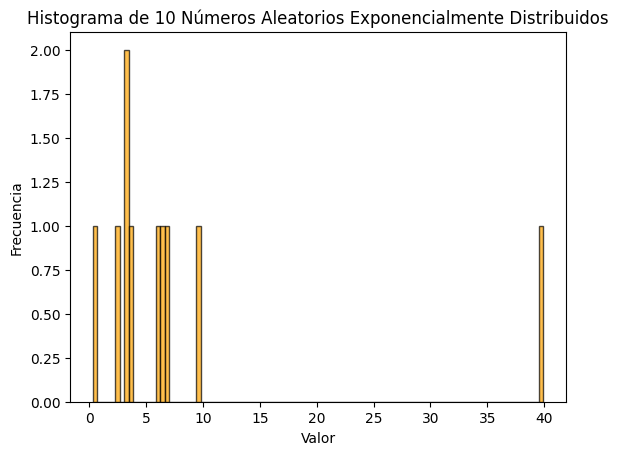

In [58]:
# Parámetros del histograma
bins = 100

# Histograma
plt.hist(size10, bins=bins, color='orange', alpha=0.7, edgecolor='black')
plt.title('Histograma de 10 Números Aleatorios Exponencialmente Distribuidos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


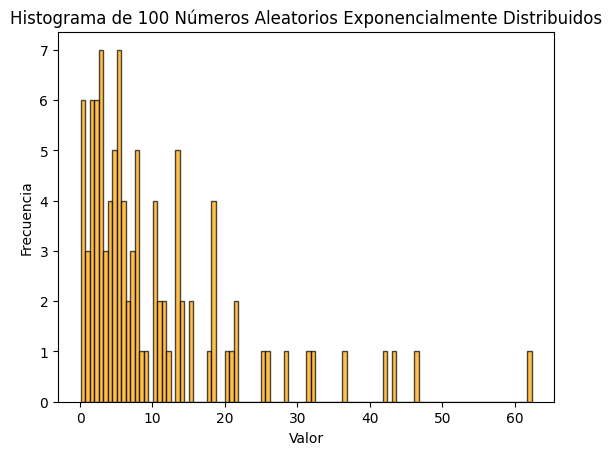

In [59]:
# Parámetros del histograma
bins = 100

# Histograma
plt.hist(size100, bins=bins, color='orange', alpha=0.7, edgecolor='black')
plt.title('Histograma de 100 Números Aleatorios Exponencialmente Distribuidos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


¿En qué se diferencian ambas distribuciones?

In [ ]:
print("Básicamente ambas distribuciones se diferencian en el número de datos aleatorios generados 10 y 100.")
print("Con 10 números aleatorios es difícil visualizar la forma exponencial decreciente.")
print("Con 100 números aleatorios sí que se empieza a visualizar la exponencial decreciente de la siguiente fórmula:")

$$ PDF (x) = \lambda e^{- \lambda x} $$

Siendo $ \frac{1}{\lambda} = 10 $  la media de la distribución

## Distribución Exponencial de datos reales

Supongamos que el tiempo que uno pasa en un banco se distribuye exponencialmente con media de 10 minutos (es decir, λ = 1/10). ¿Cuál es la probabilidad de que un cliente pase menos de quince minutos en el banco?

Escribe un código en python para resolver este problema

La función de distribución acumulativa de una variable aleatoria $ x $ para una distribución exponencial es:

$$ F(x) = 1 - e^{-\lambda x}  $$

donde:
- $ F(x) $ es la probabilidad de que $ X $ tome un valor menor o igual a $ x $.
- $ \lambda $ es la tasa de la distribución.

In [66]:
import numpy as np

# Parámetros
lambda_ = 1/10  # Tasa de la distribución
x = 15  # Tiempo en minutos

# Cálculo de la función densidad de probabilidad
pdf = lambda_ * np.exp(-lambda_ * x)

# Cálculo de la Función acumulativa de probabilidad
cdf = 1 - np.exp(-lambda_ * x)

print(f"La densidad de probabilidad en {x} minutos es de {round(pdf,4)}")
print(f"La probabilidad de pasar menos de {x} minutos es de {round(cdf,4)}")


La densidad de probabilidad en 15 minutos es de 0.0223
La probabilidad de pasar menos de 15 minutos es de 0.7769


In [69]:
# Respuesta a la pregunta
round(cdf,4)

0.7769

¿Cuál es la probabilidad de que el cliente pase más de 15 minutos?

In [71]:
# Sería lo complementario. Dado que la probabilidad total es de 1:
round(1 - cdf,4)

0.2231